In [4]:
import pandas as pd
import numpy as numpy
from IPython.display import Image

In [31]:
df_terror = pd.read_csv('../[DS]EDA 과제 3_세계테러데이터 분석/globalterrorismdb_0617dist.csv', encoding='ISO-8859-1')

C:\Users\user\AppData\Local\Temp\ipykernel_14984\253556393.py:1: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_terror = pd.read_csv('../[DS]EDA 과제 3_세계테러데이터 분석/globalterrorismdb_0617dist.csv', encoding='ISO-8859-1')


In [32]:
# pandas info show all columns 검색

df_terror.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             170350 non-null  int64  
 1    iyear               170350 non-null  int64  
 2    imonth              170350 non-null  int64  
 3    iday                170350 non-null  int64  
 4    approxdate          7464 non-null    object 
 5    extended            170350 non-null  int64  
 6    resolution          2219 non-null    object 
 7    country             170350 non-null  int64  
 8    country_txt         170350 non-null  object 
 9    region              170350 non-null  int64  
 10   region_txt          170350 non-null  object 
 11   provstate           155848 non-null  object 
 12   city                169903 non-null  object 
 13   latitude            165744 non-null  float64
 14   longitude           165744 non-null  float64
 15   specificity    

In [33]:
df_terror.shape

(170350, 135)

In [34]:
df_terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day',
                          'country_txt':'Country','region_txt':'Region',
                          'attacktype1_txt':'AttackType','target1':'Target',
                          'nkill':'Killed','nwound':'Wounded','summary':'Summary',
                          'gname':'Group','targtype1_txt':'Target_type',
                          'weaptype1_txt':'Weapon_type','motive':'Motive',
                          'city' : 'City'},inplace=True)


In [35]:
df_terror.tail(2)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
170348,201612310044,2016,12,31,NaN,0,NaN,130,Mexico,1,...,There is doubt that this incident meets terror...,"""Gunmen shoot at home of Mexican indigenous ri...",""" Gunmen shoot at home of Mexican indigenous ...",NaN,START Primary Collection,-9,-9,0,-9,NaN
170349,201701270001,2016,12,30,NaN,0,NaN,195,Sudan,11,...,There is doubt that this incident meets terror...,"""Rebels To Blame For Nierteti Killing: Central...","""Security deteriorates in West Darfur alongsid...",NaN,START Primary Collection,0,0,0,0,NaN


In [36]:
df_terror['TerroCount'] = int(1)
df_terror.tail(2)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,TerroCount
170348,201612310044,2016,12,31,NaN,0,NaN,130,Mexico,1,...,"""Gunmen shoot at home of Mexican indigenous ri...",""" Gunmen shoot at home of Mexican indigenous ...",NaN,START Primary Collection,-9,-9,0,-9,NaN,1
170349,201701270001,2016,12,30,NaN,0,NaN,195,Sudan,11,...,"""Rebels To Blame For Nierteti Killing: Central...","""Security deteriorates in West Darfur alongsid...",NaN,START Primary Collection,0,0,0,0,NaN,1


In [37]:
df_terror['Casualities']=df_terror['Killed']+df_terror['Wounded']
df_terror


,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,TerroCount,Casualities
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,PGIS,0,0,0,0,NaN,1,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,PGIS,0,1,1,1,NaN,1,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,1,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170345,201612310040,2016,12,31,NaN,0,NaN,146,Niger,11,...,"""Niger: Boko Haram attack kills two soldiers i...",NaN,START Primary Collection,1,1,0,1,NaN,1,22.0
170346,201612310042,2016,12,31,NaN,0,NaN,160,Philippines,5,...,"""Asia: US Army ASD Philippine Terrorist Media ...",NaN,START Primary Collection,-9,-9,0,-9,NaN,1,0.0
170347,201612310043,2016,12,31,NaN,1,NaN,229,Democratic Republic of the Congo,11,...,NaN,NaN,START Primary Collection,1,1,0,1,NaN,1,NaN
170348,201612310044,2016,12,31,NaN,0,NaN,130,Mexico,1,...,""" Gunmen shoot at home of Mexican indigenous ...",NaN,START Primary Collection,-9,-9,0,-9,NaN,1,0.0


In [38]:
df_terror=df_terror[['Year','Month','Day', 'TerroCount',
                     'Region', 'Country','City', 'Target', 'Group', 
                     'Target_type', 'AttackType', 'Weapon_type', 'Killed',
                     'Wounded', 'Casualities', 'Motive', 'Summary', 
                     'latitude','longitude']]
df_terror.tail(3)

,Year,Month,Day,TerroCount,Region,Country,City,Target,Group,Target_type,AttackType,Weapon_type,Killed,Wounded,Casualities,Motive,Summary,latitude,longitude
170347,2016,12,31,1,Sub-Saharan Africa,Democratic Republic of the Congo,Nakolongbo,Village,Lord's Resistance Army (LRA),Private Citizens & Property,Hostage Taking (Kidnapping),Unknown,0.0,NaN,NaN,"The specific motive is unknown; however, sourc...",12/31/2016: Assailants attacked a village and ...,4.308611,25.091389
170348,2016,12,31,1,North America,Mexico,Guachochi,Residence of Journalist: Gabriel Valencia Juarez,Unknown,Journalists & Media,Assassination,Firearms,0.0,0.0,0.0,NaN,12/31/2016: Assailants opened fire on the hous...,26.819644,-107.069898
170349,2016,12,30,1,Sub-Saharan Africa,Sudan,Nertiti,Town,Sudan Liberation Movement,Private Citizens & Property,Armed Assault,Firearms,0.0,0.0,0.0,NaN,12/30/2016: Assailants armed with firearms att...,12.961401,24.044116


In [39]:
df_terror.shape

(170350, 19)

In [40]:
df_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         170350 non-null  int64  
 1   Month        170350 non-null  int64  
 2   Day          170350 non-null  int64  
 3   TerroCount   170350 non-null  int64  
 4   Region       170350 non-null  object 
 5   Country      170350 non-null  object 
 6   City         169903 non-null  object 
 7   Target       169712 non-null  object 
 8   Group        170350 non-null  object 
 9   Target_type  170350 non-null  object 
 10  AttackType   170350 non-null  object 
 11  Weapon_type  170350 non-null  object 
 12  Killed       160668 non-null  float64
 13  Wounded      155025 non-null  float64
 14  Casualities  154524 non-null  float64
 15  Motive       48586 non-null   object 
 16  Summary      104212 non-null  object 
 17  latitude     165744 non-null  float64
 18  longitude    165744 non-

### 결측데이터 확인

In [41]:
df_terror.isnull().sum()

Year                0
Month               0
Day                 0
TerroCount          0
Region              0
Country             0
City              447
Target            638
Group               0
Target_type         0
AttackType          0
Weapon_type         0
Killed           9682
Wounded         15325
Casualities     15826
Motive         121764
Summary         66138
latitude         4606
longitude        4606
dtype: int64

In [42]:
# 결측 데이터 시각화
# !conda install -y missingno

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\miniconda3\envs\ds_study

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    missingno-0.4.2            |     pyhd3eb1b0_1          15 KB
    ------------------------------------------------------------
                                           Total:          15 KB

The following NEW packages will be INSTALLED:

  missingno          pkgs/main/noarch::missingno-0.4.2-pyhd3eb1b0_1 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform
from matplotlib import font_manager, rc

path = 'c:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unlown system...sorry..')

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

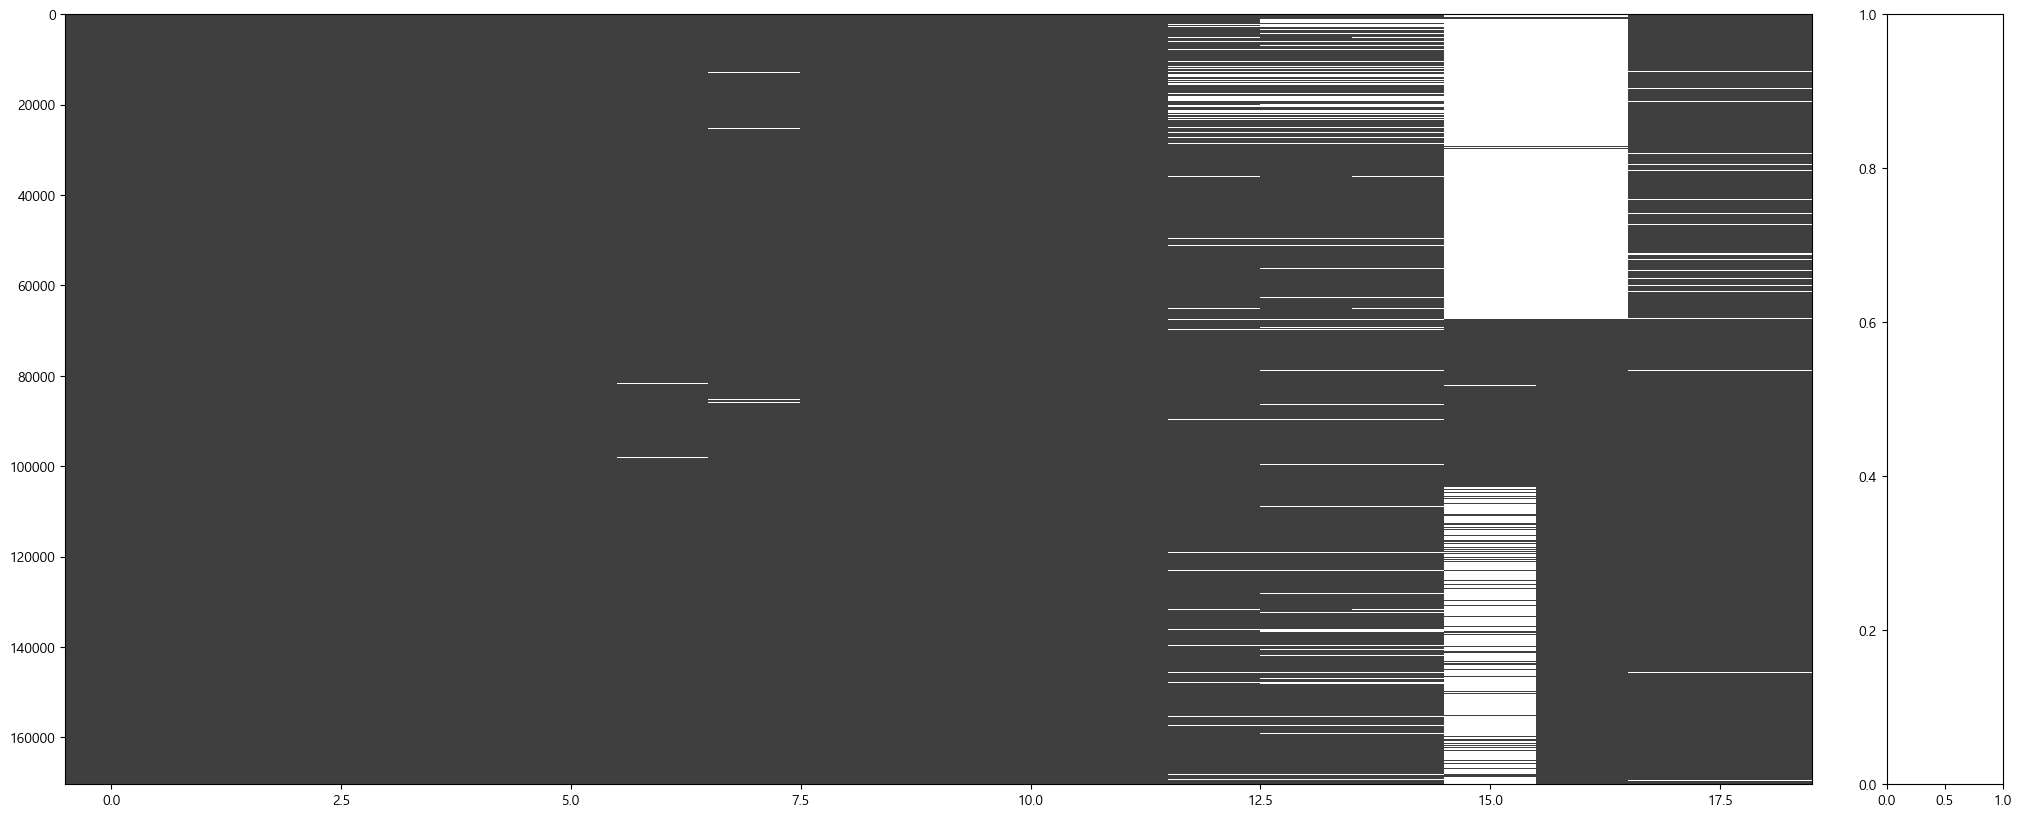

In [45]:
import missingno as msno

msno.matrix(df_terror)
plt.show()

### category 데이터 검색

In [46]:
df_terror.columns

Index(['Year', 'Month', 'Day', 'TerroCount', 'Region', 'Country', 'City',
       'Target', 'Group', 'Target_type', 'AttackType', 'Weapon_type', 'Killed',
       'Wounded', 'Casualities', 'Motive', 'Summary', 'latitude', 'longitude'],
      dtype='object')

In [50]:
def category_data_eda(col):
    print('='*100)
    print(f'{col} Data')
    print('='*100)
    print('Basic Information')
    print('Data Length->', len(df_terror[col].unique()))
    print('Data Nan->', df_terror[col].isnull().sum())
    print('='*100)
    print('Top 5 Data->', df_terror[col].value_counts()[:5])
    print('='*100)
    print('Uniqe Data List')
    print(df_terror[col].unique()[:10])

In [52]:
category_data_eda('Region')

Region Data
Basic Information
Data Length-> 12
Data Nan-> 0
Top 5 Data-> Region
Middle East & North Africa    46511
South Asia                    41497
South America                 18762
Western Europe                16307
Sub-Saharan Africa            15491
Name: count, dtype: int64
Uniqe Data List
['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania']


---

### 문제1)
- 먼저 데이터의 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러숫자를 시각화하시오.
- 시각화를 해보면 전 세계 테러는 어떤 특정 연도를 기점으로 갑자기 급격히증가 합니다. 
- 이 구간을 특정 짓고 그 "기점”에 세계적 이슈가 무엇이 있었는지를 추측해보세요
- 단, 위 추측은 현단계에서는 단지 아직은 “상상”일 뿐입니다.

### 년도별 테러 발생 건수 확인

In [54]:
df_terror.tail(3)

,Year,Month,Day,TerroCount,Region,Country,City,Target,Group,Target_type,AttackType,Weapon_type,Killed,Wounded,Casualities,Motive,Summary,latitude,longitude
170347,2016,12,31,1,Sub-Saharan Africa,Democratic Republic of the Congo,Nakolongbo,Village,Lord's Resistance Army (LRA),Private Citizens & Property,Hostage Taking (Kidnapping),Unknown,0.0,NaN,NaN,"The specific motive is unknown; however, sourc...",12/31/2016: Assailants attacked a village and ...,4.308611,25.091389
170348,2016,12,31,1,North America,Mexico,Guachochi,Residence of Journalist: Gabriel Valencia Juarez,Unknown,Journalists & Media,Assassination,Firearms,0.0,0.0,0.0,NaN,12/31/2016: Assailants opened fire on the hous...,26.819644,-107.069898
170349,2016,12,30,1,Sub-Saharan Africa,Sudan,Nertiti,Town,Sudan Liberation Movement,Private Citizens & Property,Armed Assault,Firearms,0.0,0.0,0.0,NaN,12/30/2016: Assailants armed with firearms att...,12.961401,24.044116


- .reset_index(), .to_frame() 이용하여 시리즈를 데이터프레임으로 변환

In [59]:
df_terror.groupby('Year')['TerroCount'].sum().reset_index()[-5:]


,Year,TerroCount
41,2012,8500
42,2013,11996
43,2014,16860
44,2015,14852
45,2016,13488


In [60]:
df_terror.groupby('Year')['TerroCount'].sum().to_frame()[-5:]

,TerroCount
Year,
2012,8500
2013,11996
2014,16860
2015,14852
2016,13488


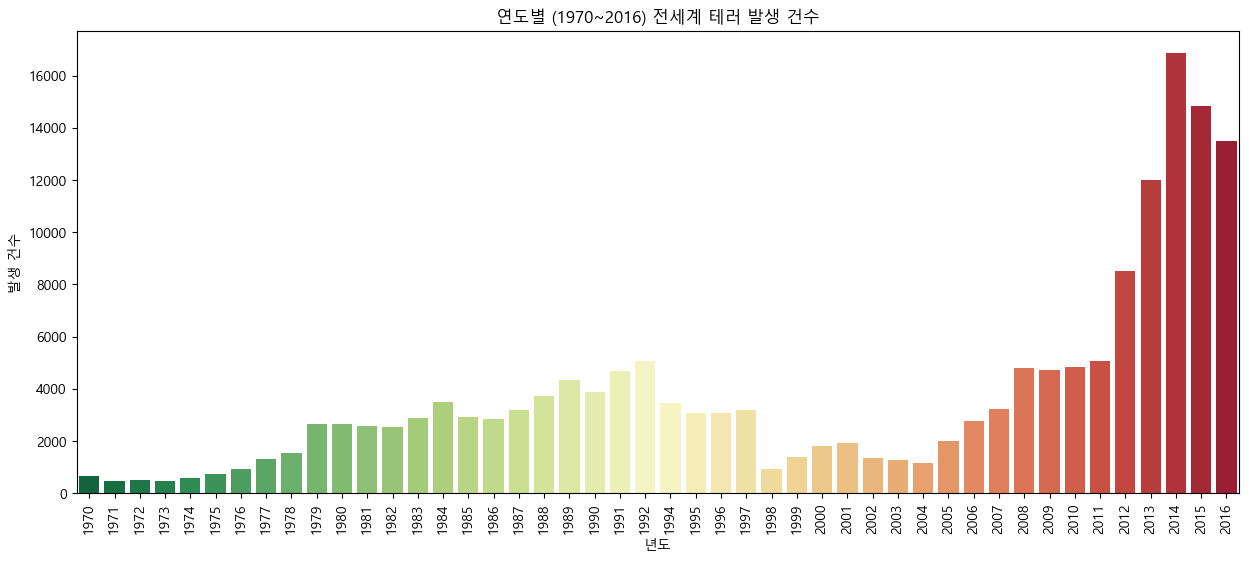

In [68]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x=df_terror['Year'], palette='RdYlGn_r')
plt.xticks(rotation=90) # x축 항목 기울기 설정
plt.title('연도별 (1970~2016) 전세계 테러 발생 건수') # 전체 제목
plt.xlabel('년도') # x축 이름
plt.ylabel('발생 건수') # y축 이름
plt.show()

### 2012 ~ 2016 테러 발생 상세 건수 확인

[<BarContainer object of 5 artists>]


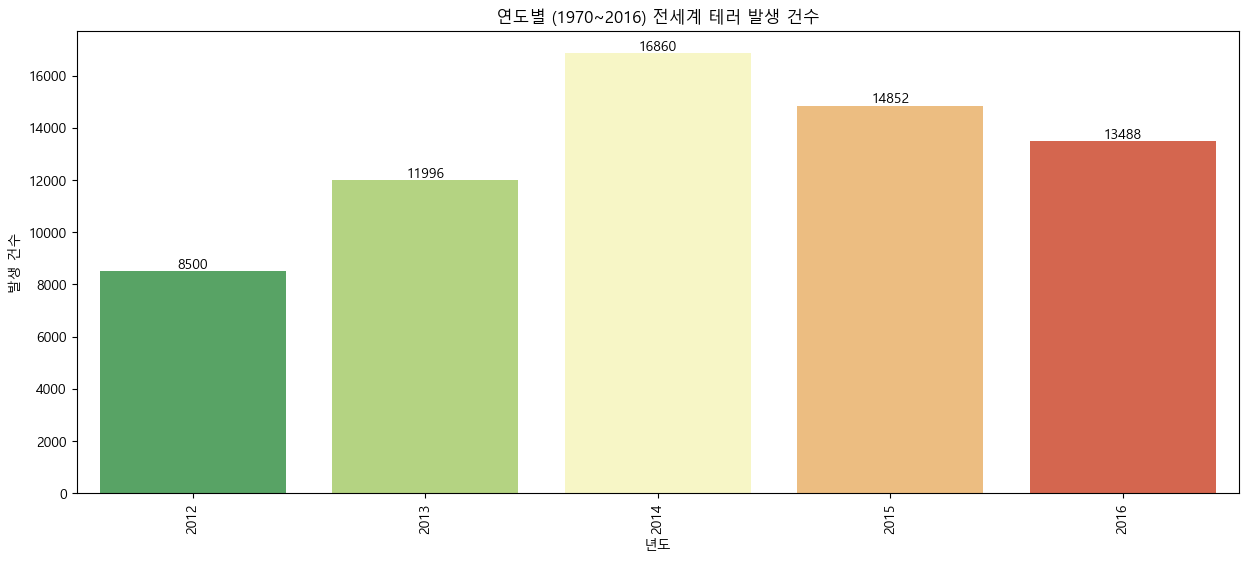

In [75]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data= df_terror[df_terror['Year'] > 2011], palette='RdYlGn_r')

ax.bar_label(ax.containers[0]) # 바 그래프의 실제 값을 넣어주는 설저
# labels=[1, 2, 3, 4, 5] : 바의 이름 설정
# fmt='%.2f' : 소수점 표현 설정
# label_type='center' : 바 이름의 위치 설정
print(ax.containers)

plt.xticks(rotation=90) # x축 항목 기울기 설정
plt.title('연도별 (1970~2016) 전세계 테러 발생 건수') # 전체 제목
plt.xlabel('년도') # x축 이름
plt.ylabel('발생 건수') # y축 이름
plt.show()

##### 분석 결과 
- 2012~2014년도 급격한 테러 발생 건수가 발생하였으며 이때 종교 극단주의자에 의한 테러가 많이 발생
- 2014년도 이후 다시 테러가 발생 건수가 줄어들었다면 어떠한 이슈, 세계 현황, 정치적 요소가 발생했는지도 생각할 수 있음

### 문제2)
- 전세계 테러 데이터를 가지고, 테러가 많이 일어난 국가를 정렬해서 상위 10위의 국가를 시각화하세요

In [77]:
# 테러가 많이 일어난 상위 10개 국가
country_top10 = df_terror['Country'].value_counts()[:10]
country_top10

Country
Iraq              22130
Pakistan          13634
Afghanistan       11306
India             10978
Colombia           8163
Philippines        6212
Peru               6088
El Salvador        5320
United Kingdom     5098
Turkey             4106
Name: count, dtype: int64

In [79]:
# 테러가 많이 일어난 상위 10개 국가의 백분율
import numpy as np

country_top10_pct = np.round(country_top10.div(country_top10.sum()) *100, 1)
country_top10_pct

Country
Iraq              23.8
Pakistan          14.7
Afghanistan       12.2
India             11.8
Colombia           8.8
Philippines        6.7
Peru               6.5
El Salvador        5.7
United Kingdom     5.5
Turkey             4.4
Name: count, dtype: float64

In [80]:
country_top10_df = pd.merge(country_top10, country_top10_pct, 
                            on=country_top10.index)
country_top10_df

,key_0,count_x,count_y
0,Iraq,22130,23.8
1,Pakistan,13634,14.7
2,Afghanistan,11306,12.2
3,India,10978,11.8
4,Colombia,8163,8.8
5,Philippines,6212,6.7
6,Peru,6088,6.5
7,El Salvador,5320,5.7
8,United Kingdom,5098,5.5
9,Turkey,4106,4.4


In [93]:
country_top10_df = country_top10_df.rename(columns={'key_0':'Country',
                                                    'count_x' : 'TerrorCount',
                                                   'count_y' : 'TerrorPercent'})

In [94]:
country_top10_df

,Country,TerrorCount,TerrorPercent
0,Iraq,22130,23.8
1,Pakistan,13634,14.7
2,Afghanistan,11306,12.2
3,India,10978,11.8
4,Colombia,8163,8.8
5,Philippines,6212,6.7
6,Peru,6088,6.5
7,El Salvador,5320,5.7
8,United Kingdom,5098,5.5
9,Turkey,4106,4.4


In [95]:
print('Total TerrorCnt :', country_top10_df['TerrorCount'].sum())

Total TerrorCnt : 93035


In [121]:
df_terror['Country']

0                       Dominican Republic
1                                   Mexico
2                              Philippines
3                                   Greece
4                                    Japan
                        ...               
170345                               Niger
170346                         Philippines
170347    Democratic Republic of the Congo
170348                              Mexico
170349                               Sudan
Name: Country, Length: 170350, dtype: object

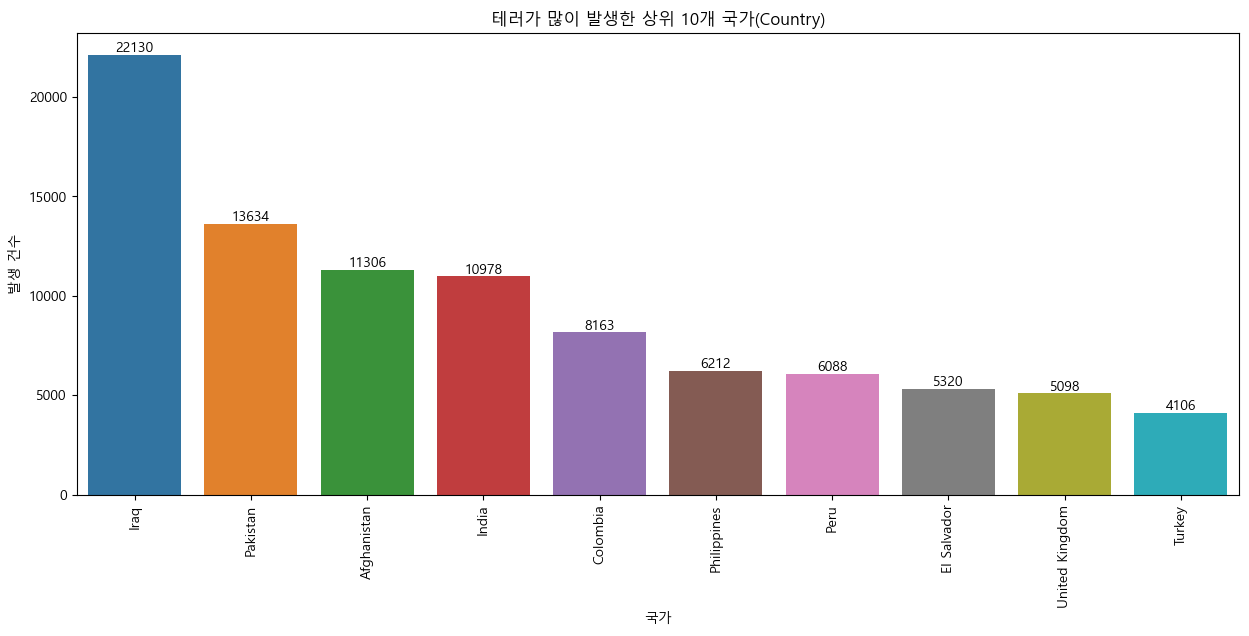

In [125]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.countplot(x='Country', data = df_terror, order=df_terror['Country'].value_counts().index[:10].tolist())
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90) # x축 항목 기울기 설정
plt.title('테러가 많이 발생한 상위 10개 국가(Country)') # 전체 제목
plt.xlabel('국가') # x축 이름
plt.ylabel('발생 건수') # y축 이름
plt.show()


In [126]:
category_data_eda('Country')

Country Data
Basic Information
Data Length-> 205
Data Nan-> 0
Top 5 Data-> Country
Iraq           22130
Pakistan       13634
Afghanistan    11306
India          10978
Colombia        8163
Name: count, dtype: int64
Uniqe Data List
['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia']


- 전체 205개 국가 중 테러 발생 상위 10개 국가는 이라크 22,130, 아프가니스탄 13,634, 아르헨티나 11,306, 인도 10,978, 콜롬비아 8,163, 필리핀 6,212 페루 6,088
- 엘 셀바도르 5,320, 영국 5,098, 터키 4,106 이다

### 문제3)
- 문제 2의 전세계 테러가 일어난 횟수별 상위 10위 국가에 대해 국가별로 사망자수와 부상자수를 구분하여 시각화하시오.
- 만약 국가별로 다른 국가와 사망자수, 부상자수의 특성이 다른 국가들이 있다면 시각화에 신경을 쓰세요.
- 즉, 어떤국가는 테러횟수와 사상자(사망자수+부상자수)가 비슷한 경우가 있고, 또 어떤 국가는 테러횟수에 비해 사상자수가 많은 경우가 있을겁니다

In [127]:
df_terror['Country'].value_counts()[:10]

Country
Iraq              22130
Pakistan          13634
Afghanistan       11306
India             10978
Colombia           8163
Philippines        6212
Peru               6088
El Salvador        5320
United Kingdom     5098
Turkey             4106
Name: count, dtype: int64

In [128]:
country_top10_df

,Country,TerrorCount,TerrorPercent
0,Iraq,22130,23.8
1,Pakistan,13634,14.7
2,Afghanistan,11306,12.2
3,India,10978,11.8
4,Colombia,8163,8.8
5,Philippines,6212,6.7
6,Peru,6088,6.5
7,El Salvador,5320,5.7
8,United Kingdom,5098,5.5
9,Turkey,4106,4.4


In [129]:
df_terror.columns

Index(['Year', 'Month', 'Day', 'TerroCount', 'Region', 'Country', 'City',
       'Target', 'Group', 'Target_type', 'AttackType', 'Weapon_type', 'Killed',
       'Wounded', 'Casualities', 'Motive', 'Summary', 'latitude', 'longitude'],
      dtype='object')

In [134]:
# 국가별 사망자 부상자 사상자 데이터 프레임

df_terror.groupby('Country')[['Killed', 'Wounded', 'Casualities']].sum().reset_index()
# 여러 개의 열을 동시에 선택하려고 할 때 열 이름을 리스트 형태로 전달하기 위하여 컬럼을 한번더 [](=리스트)로 묶어주기

,Country,Killed,Wounded,Casualities
0,Afghanistan,33146.0,38228.0,68363.0
1,Albania,42.0,126.0,168.0
2,Algeria,11091.0,9064.0,19235.0
3,Andorra,0.0,0.0,0.0
4,Angola,3036.0,2044.0,4458.0
...,...,...,...,...
200,Yemen,8011.0,8616.0,14849.0
201,Yugoslavia,119.0,281.0,391.0
202,Zaire,325.0,215.0,512.0
203,Zambia,70.0,62.0,132.0


In [135]:
country_top10_casualities = pd.merge(
    country_top10_df, df_terror.groupby('Country')[['Killed', 'Wounded', 'Casualities']].sum().reset_index(),
    on='Country', how='left'
)
country_top10_casualities

,Country,TerrorCount,TerrorPercent,Killed,Wounded,Casualities
0,Iraq,22130,23.8,71082.0,129437.0,191464.0
1,Pakistan,13634,14.7,22734.0,39925.0,61240.0
2,Afghanistan,11306,12.2,33146.0,38228.0,68363.0
3,India,10978,11.8,18842.0,28241.0,45880.0
4,Colombia,8163,8.8,14600.0,10199.0,23553.0
5,Philippines,6212,6.7,9058.0,12694.0,21208.0
6,Peru,6088,6.5,12763.0,4074.0,16234.0
7,El Salvador,5320,5.7,12053.0,5062.0,16181.0
8,United Kingdom,5098,5.5,3367.0,5799.0,7241.0
9,Turkey,4106,4.4,6664.0,9572.0,16145.0


<Axes: ylabel='Country'>

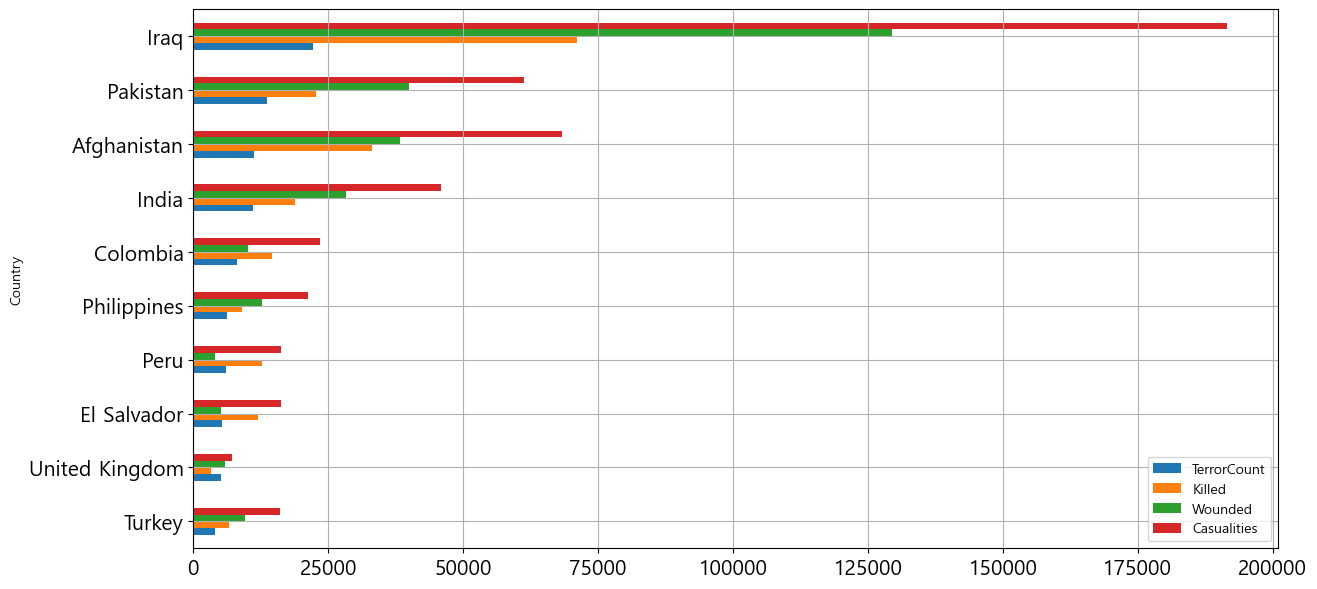

In [145]:
# 상위 10개 국가의 사망자, 부상자, 사상자 시각화

country_top10_casualities.sort_values(by='TerrorCount', ascending=True).plot(kind='barh', 
                                                                        x='Country', y=['TerrorCount', 'Killed', 'Wounded', 'Casualities'], 
                                                                        figsize=(14, 7), fontsize=15, grid=True)

### 문제4)
- 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아지역으로구분하여
- 각 지역 별로 테러 공격 형태, 사망자와 사상자의 수 등에 대해 각 지역별로 특성들이 있는지를 확인하세요
- 여러분들은 데이터를 충분히 관찰하면서 신중하게 결과를 정리하세요

#### .crosstab = .pivot_table과 같은 기능의 메써드로 좀 더 설정할 값들이 적다

In [147]:
# 지역별
# 테러 공격 형태

pd.crosstab(df_terror['Region'], df_terror['AttackType'])

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Region,,,,,,,,,
Australasia & Oceania,49,30,73,67,3,5,11,10,16
Central America & Caribbean,4360,1253,3239,401,26,187,501,19,354
Central Asia,115,114,231,19,8,2,45,4,16
East Asia,114,55,327,198,18,3,14,42,23
Eastern Europe,1254,386,2720,239,26,20,216,57,113
Middle East & North Africa,8740,4060,28314,1049,126,87,2417,164,1554
North America,406,237,1528,872,18,63,121,69,32
South America,3824,2713,8977,776,66,229,1378,47,752
South Asia,10604,3967,19834,1898,85,100,3002,279,1728


### 지역별 테러 공격 형태에 따른 사망자와 사상자 수

In [161]:
category_data_eda('AttackType')

AttackType Data
Basic Information
Data Length-> 9
Data Nan-> 0
Top 5 Data-> AttackType
Bombing/Explosion                 83073
Armed Assault                     40223
Assassination                     18402
Hostage Taking (Kidnapping)       10233
Facility/Infrastructure Attack     9581
Name: count, dtype: int64
Uniqe Data List
['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


<Axes: ylabel='Region'>

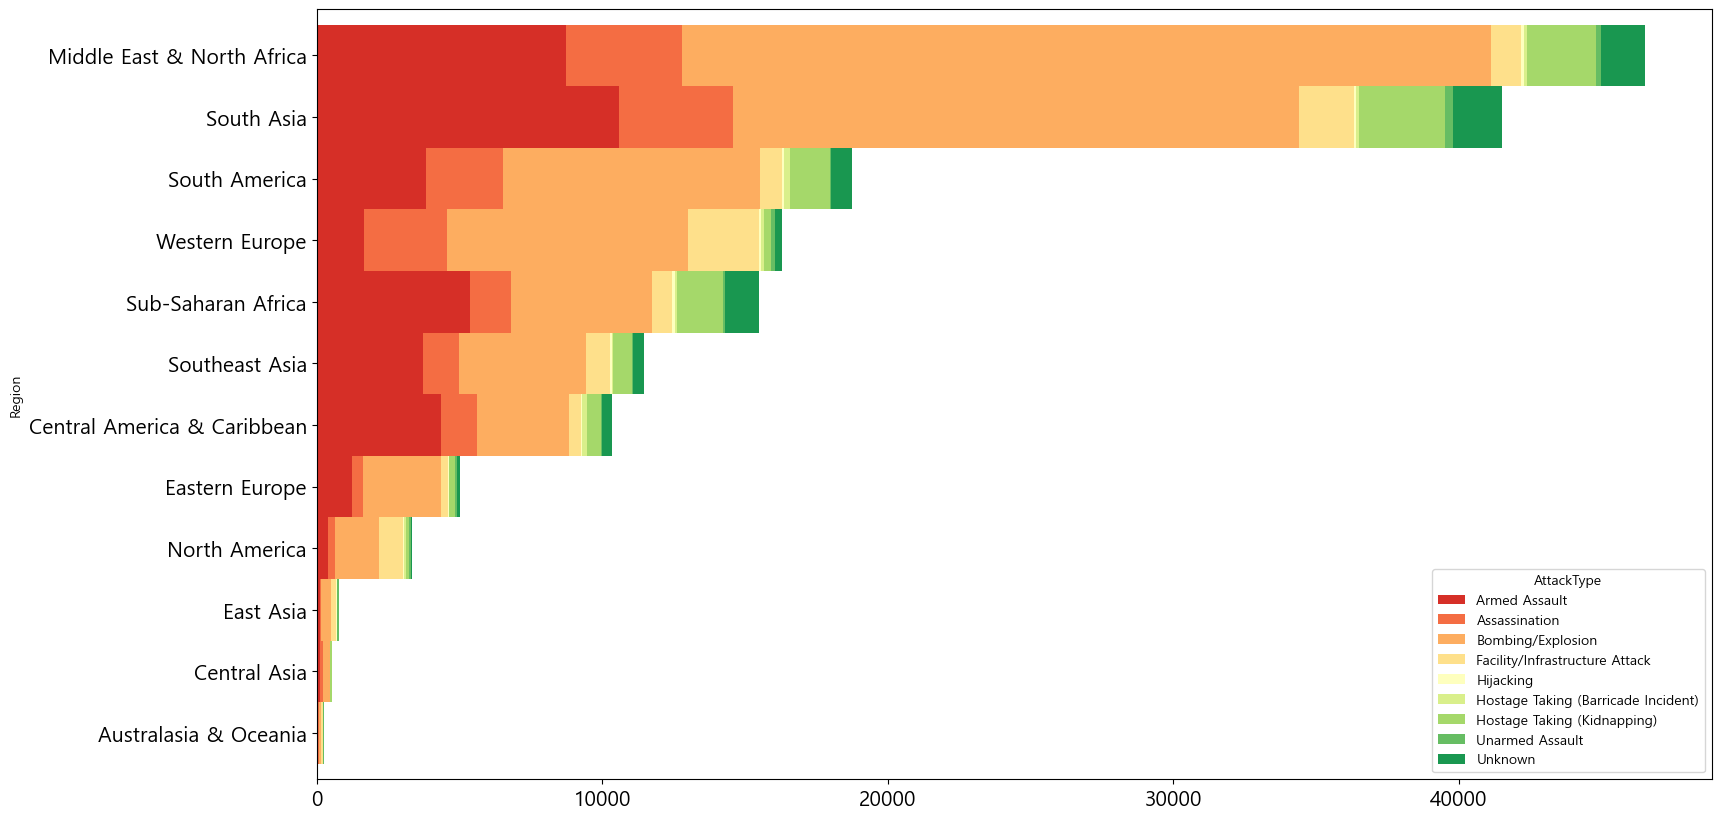

In [194]:
pd.crosstab(df_terror['Region'], df_terror['AttackType']).sort_values(by='Bombing/Explosion', ascending=True).plot(
                                                                kind='barh',stacked=True, figsize=(18, 10),
                                                               color = sns.color_palette('RdYlGn', 9), fontsize=15, width = 1)

### 지역별 테러 공격 형태, 사망자와 사상자 수 분석
- 중동&아프리카 지역

In [212]:
# 중동 지역
# 중동 지역의 공격 형태, 테러 건수, 사상자

region_attacktype_casualities_df = df_terror[['Region', 'AttackType', 'TerroCount', 'Killed', 'Wounded', 'Casualities']].groupby(['Region', 'AttackType']).sum()
region_attacktype_casualities_df

TerroCount  Killed  \
Region                AttackType                                                
Australasia & Oceania Armed Assault                                49    77.0   
                      Assassination                                30    34.0   
                      Bombing/Explosion                            73     9.0   
                      Facility/Infrastructure Attack               67     0.0   
                      Hijacking                                     3     0.0   
...                                                               ...     ...   
Western Europe        Hijacking                                    63   126.0   
                      Hostage Taking (Barricade Incident)          86   168.0   
                      Hostage Taking (Kidnapping)                 269    78.0   
                      Unarmed Assault                             126    32.0   
                      Unknown                                     260    30.0   

                                                           Wounded  \
Region                AttackType                                     
Australasia & Oceania Armed Assault                           87.0   
                      Assassination                            9.0   
                      Bombing/Explosion                       77.0   
                      Facility/Infrastructure Attack          13.0   
                      Hijacking                                0.0   
...                                                            ...   
Western Europe        Hijacking                               49.0   
                      Hostage Taking (Barricade Incident)    387.0   
                      Hostage Taking (Kidnapping)             34.0   
                      Unarmed Assault                        288.0   
                      Unknown                                126.0   

                                                           Casualities  
Region                AttackType                                        
Australasia & Oceania Armed Assault                              163.0  
                      Assassination                               43.0  
                      Bombing/Explosion                           86.0  
                      Facility/Infrastructure Attack              13.0  
                      Hijacking                                    0.0  
...                                                                ...  
Western Europe        Hijacking                                  128.0  
                      Hostage Taking (Barricade Incident)        529.0  
                      Hostage Taking (Kidnapping)                 78.0  
                      Unarmed Assault                            310.0  
                      Unknown                                    147.0  

[108 rows x 4 columns]

In [213]:
mideast_attacktype_percent = np.round(region_attacktype_casualities_df.loc['Middle East & North Africa']['TerroCount']\
         .div(region_attacktype_casualities_df.loc['Middle East & North Africa']['TerroCount'].sum()) * 100, 2)
mideast_attacktype_percent

AttackType
Armed Assault                          18.79
Assassination                           8.73
Bombing/Explosion                      60.88
Facility/Infrastructure Attack          2.26
Hijacking                               0.27
Hostage Taking (Barricade Incident)     0.19
Hostage Taking (Kidnapping)             5.20
Unarmed Assault                         0.35
Unknown                                 3.34
Name: TerroCount, dtype: float64

In [214]:
mideast_attacktype_df = region_attacktype_casualities_df.loc['Middle East & North Africa'].reset_index()
mideast_attacktype_df

,AttackType,TerroCount,Killed,Wounded,Casualities
0,Armed Assault,8740,24951.0,14108.0,36163.0
1,Assassination,4060,4662.0,4386.0,8921.0
2,Bombing/Explosion,28314,74797.0,180316.0,247274.0
3,Facility/Infrastructure Attack,1049,790.0,672.0,1281.0
4,Hijacking,126,124.0,66.0,182.0
5,Hostage Taking (Barricade Incident),87,658.0,591.0,1043.0
6,Hostage Taking (Kidnapping),2417,10983.0,1394.0,6430.0
7,Unarmed Assault,164,118.0,646.0,699.0
8,Unknown,1554,8593.0,3071.0,8796.0


### 문제5)
- 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 진행한 문제4번에대해
- 문제1번에서 특정 지은 시기를 기준으로 다시 분리하여 테러의양상을 분석해보시오.
- 그리고본인의분석결과를제시하시오


In [241]:
year2006_df = df_terror[df_terror['Year'] == 2006]
year2006_df.tail(2)

,Year,Month,Day,TerroCount,Region,Country,City,Target,Group,Target_type,AttackType,Weapon_type,Killed,Wounded,Casualities,Motive,Summary,latitude,longitude
81996,2006,12,31,1,South Asia,Nepal,Khadgapur,Van with passengers inside,Janatantrik Terai Mukti Morcha- Jwala Singh (J...,Private Citizens & Property,Facility/Infrastructure Attack,Melee,0.0,0.0,0.0,The publication was not giving priority to new...,12/31/2006: Members of Janatantrik Terai Mukti...,26.540192,86.590034
81997,2006,12,31,1,South Asia,Nepal,Sundarpur,Govinda Upreti,Janatantrik Terai Mukti Morcha (JTMM),Private Citizens & Property,Hostage Taking (Kidnapping),Unknown,1.0,0.0,1.0,The motive for Uprety's kidnapping is unknown;...,12/31/2006: Cadres of Janatantrik Terai Mukti ...,26.886545,85.495654


In [242]:
region_attacktype_casualities_2006_df = year2006_df[['Region', 'AttackType', 'TerroCount', 'Killed', 'Wounded', 'Casualities']].groupby(['Region', 'AttackType']).sum()
region_attacktype_casualities_2006_df

TerroCount  \
Region                      AttackType                                        
Australasia & Oceania       Bombing/Explosion                             1   
                            Facility/Infrastructure Attack                1   
Central America & Caribbean Armed Assault                                 2   
                            Assassination                                 3   
Central Asia                Armed Assault                                 2   
...                                                                     ...   
Western Europe              Bombing/Explosion                            64   
                            Facility/Infrastructure Attack               27   
                            Hostage Taking (Barricade Incident)           1   
                            Hostage Taking (Kidnapping)                   1   
                            Unarmed Assault                               1   

                                                                 Killed  \
Region                      AttackType                                    
Australasia & Oceania       Bombing/Explosion                       0.0   
                            Facility/Infrastructure Attack          0.0   
Central America & Caribbean Armed Assault                           3.0   
                            Assassination                           4.0   
Central Asia                Armed Assault                           3.0   
...                                                                 ...   
Western Europe              Bombing/Explosion                       3.0   
                            Facility/Infrastructure Attack          0.0   
                            Hostage Taking (Barricade Incident)     0.0   
                            Hostage Taking (Kidnapping)             0.0   
                            Unarmed Assault                         0.0   

                                                                 Wounded  \
Region                      AttackType                                     
Australasia & Oceania       Bombing/Explosion                        0.0   
                            Facility/Infrastructure Attack           0.0   
Central America & Caribbean Armed Assault                            1.0   
                            Assassination                            0.0   
Central Asia                Armed Assault                            2.0   
...                                                                  ...   
Western Europe              Bombing/Explosion                       23.0   
                            Facility/Infrastructure Attack           4.0   
                            Hostage Taking (Barricade Incident)      2.0   
                            Hostage Taking (Kidnapping)              0.0   
                            Unarmed Assault                          2.0   

                                                                 Casualities  
Region                      AttackType                                        
Australasia & Oceania       Bombing/Explosion                            0.0  
                            Facility/Infrastructure Attack               0.0  
Central America & Caribbean Armed Assault                                4.0  
                            Assassination                                4.0  
Central Asia                Armed Assault                                5.0  
...                                                                      ...  
Western Europe              Bombing/Explosion                           26.0  
                            Facility/Infrastructure Attack               4.0  
                            Hostage Taking (Barricade Incident)          2.0  
                            Hostage Taking (Kidnapping)                  0.0  
                            Unarmed Assault                              2.0  

[67 rows x 4 columns]

In [248]:
mideast_attacktype_2006_percent = np.round(region_attacktype_casualities_2006_df.loc['Middle East & North Africa']['TerroCount']\
.div(region_attacktype_casualities_2006_df.loc['Middle East & North Africa']['TerroCount'].sum()) * 100, 2)
mideast_attacktype_2006_df = region_attacktype_casualities_2006_df.loc['Middle East & North Africa'].reset_index()
mideast_2006_df = pd.merge(mideast_attacktype_2006_df, mideast_attacktype_2006_percent, on='AttackType')
mideast_2006_df = mideast_2006_df.rename(columns={'TerroCount_x' : 'TerroCount', 'TerroCount_y' : 'TerrorPercent'})
mideast_2006_df = mideast_2006_df.sort_values(by='TerrorPercent', ascending=False)
mideast_2006_df = mideast_2006_df[['AttackType', 'TerroCount', 'TerrorPercent', 'Killed', 'Wounded', 'Casualities']]
mideast_2006_df

,AttackType,TerroCount,TerrorPercent,Killed,Wounded,Casualities
2,Bombing/Explosion,712,60.44,3659.0,8538.0,11934.0
0,Armed Assault,288,24.45,1030.0,590.0,1486.0
6,Hostage Taking (Kidnapping),99,8.40,135.0,9.0,129.0
1,Assassination,56,4.75,125.0,30.0,154.0
3,Facility/Infrastructure Attack,10,0.85,21.0,4.0,6.0
7,Unknown,10,0.85,44.0,23.0,67.0
5,Hostage Taking (Barricade Incident),2,0.17,0.0,0.0,0.0
4,Hijacking,1,0.08,2.0,5.0,7.0


- 동일 단어 한번에 조회 및 바꾸기 clt + shoft + L

In [254]:
year2016_df = df_terror[df_terror['Year'] == 2016]

region_attacktype_casualities_2016_df = year2016_df[['Region', 'AttackType', 'TerroCount', 'Killed', 'Wounded', 'Casualities']].groupby(['Region', 'AttackType']).sum()

mideast_attacktype_2016_percent = np.round(region_attacktype_casualities_2016_df.loc['Middle East & North Africa']['TerroCount']\
.div(region_attacktype_casualities_2016_df.loc['Middle East & North Africa']['TerroCount'].sum()) * 100, 2)
mideast_attacktype_2016_df = region_attacktype_casualities_2016_df.loc['Middle East & North Africa'].reset_index()
mideast_2016_df = pd.merge(mideast_attacktype_2016_df, mideast_attacktype_2016_percent, on='AttackType')
mideast_2016_df = mideast_2016_df.rename(columns={'TerroCount_x' : 'TerroCount', 'TerroCount_y' : 'TerrorPercent'})
mideast_2016_df = mideast_2016_df.sort_values(by='TerrorPercent', ascending=False)
mideast_2016_df = mideast_2016_df[['AttackType', 'TerroCount', 'TerrorPercent', 'Killed', 'Wounded', 'Casualities']]
mideast_2016_df

,AttackType,TerroCount,TerrorPercent,Killed,Wounded,Casualities
2,Bombing/Explosion,4262,70.01,12034.0,20797.0,31313.0
0,Armed Assault,718,11.79,1513.0,870.0,2259.0
8,Unknown,398,6.54,2300.0,585.0,2344.0
6,Hostage Taking (Kidnapping),380,6.24,2971.0,699.0,2736.0
1,Assassination,170,2.79,224.0,202.0,424.0
3,Facility/Infrastructure Attack,130,2.14,1.0,112.0,113.0
7,Unarmed Assault,14,0.23,8.0,24.0,32.0
4,Hijacking,8,0.13,1.0,0.0,1.0
5,Hostage Taking (Barricade Incident),8,0.13,69.0,80.0,138.0


In [279]:
def problem_solve_5(year, region):
    
    year_df = df_terror[df_terror['Year'] == year]

    region_df = year_df[['Region', 'AttackType', 'TerroCount', 'Killed', 'Wounded', 'Casualities']].groupby(['Region', 'AttackType']).sum()

    percent = np.round(region_df.loc[region]['TerroCount'].div(region_df.loc[region]['TerroCount'].sum()) * 100, 2)
    attacktype_df = region_df.loc[region].reset_index()
    result_df = pd.merge(attacktype_df, percent, on='AttackType')
    result_df = result_df.rename(columns={'TerroCount_x' : 'TerroCount', 'TerroCount_y' : 'TerrorPercent'})
    result_df = result_df.sort_values(by='TerrorPercent', ascending=False)
    result_df = result_df[['AttackType', 'TerroCount', 'TerrorPercent', 'Killed', 'Wounded', 'Casualities']]
    result_df['Year'] = year
    
    return result_df

In [261]:
category_data_eda('Region')

Region Data
Basic Information
Data Length-> 12
Data Nan-> 0
Top 5 Data-> Region
Middle East & North Africa    46511
South Asia                    41497
South America                 18762
Western Europe                16307
Sub-Saharan Africa            15491
Name: count, dtype: int64
Uniqe Data List
['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania']


In [267]:
# 2001년과 2016년 비교

mid01 = problem_solve_5(2001, 'Middle East & North Africa')
mid16 = problem_solve_5(2016, 'Middle East & North Africa')

mid_01_16 = pd.concat([mid01, mid16])
mid_01_16

,AttackType,TerroCount,TerrorPercent,Killed,Wounded,Casualities,Year
0,Armed Assault,181,50.00,610.0,289.0,828.0,2001
2,Bombing/Explosion,144,39.78,222.0,1108.0,1318.0,2001
1,Assassination,12,3.31,19.0,4.0,23.0,2001
6,Hostage Taking (Kidnapping),9,2.49,19.0,6.0,25.0,2001
8,Unknown,7,1.93,32.0,9.0,41.0,2001
3,Facility/Infrastructure Attack,4,1.10,0.0,2.0,2.0,2001
4,Hijacking,2,0.55,3.0,2.0,2.0,2001
7,Unarmed Assault,2,0.55,1.0,4.0,5.0,2001
5,Hostage Taking (Barricade Incident),1,0.28,0.0,0.0,0.0,2001
2,Bombing/Explosion,4262,70.01,12034.0,20797.0,31313.0,2016


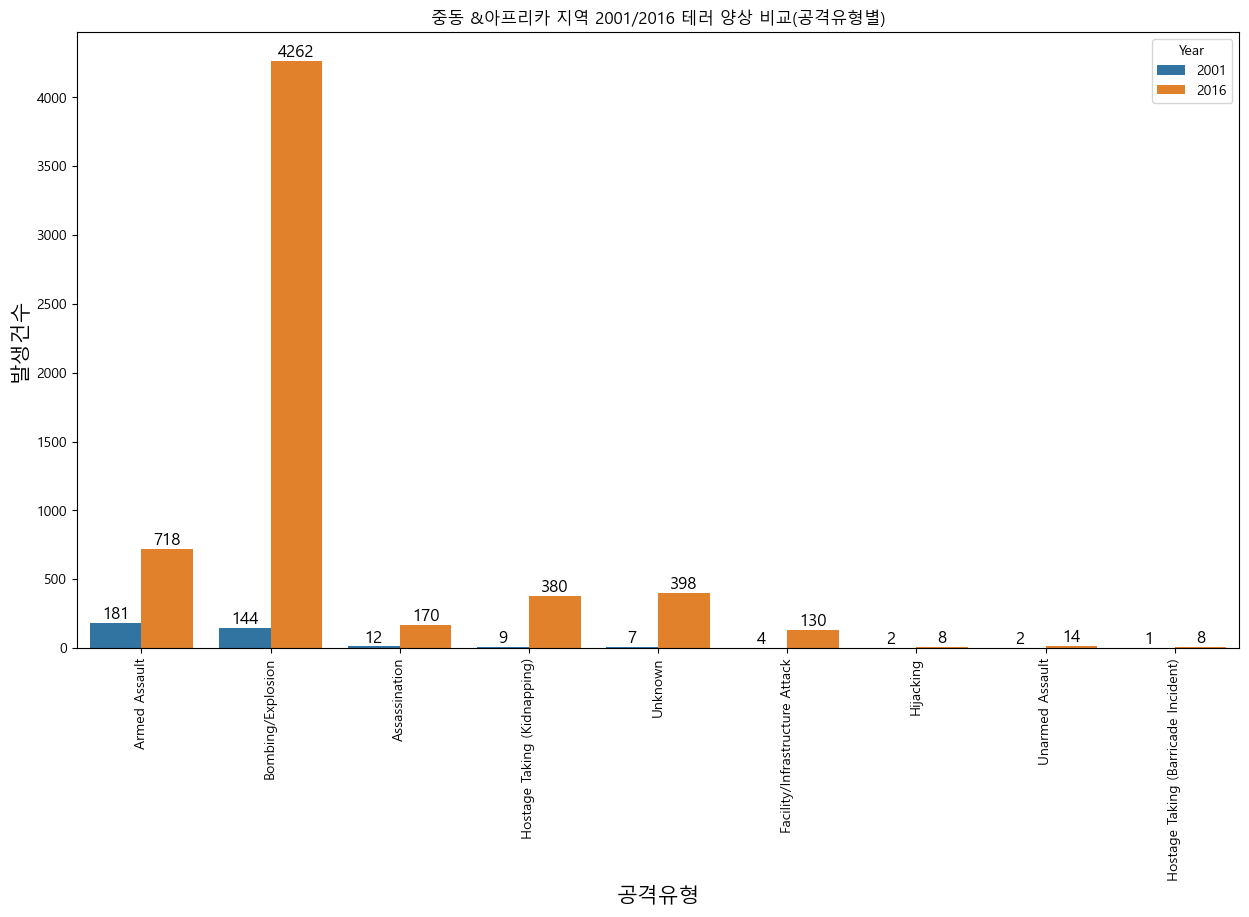

In [272]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.barplot(x=mid_01_16['AttackType'], y=mid_01_16['TerroCount'], hue=mid_01_16['Year'])
ax.bar_label(ax.containers[0], fontsize = 12)
ax.bar_label(ax.containers[1], fontsize = 12)

plt.xticks(rotation = 90)
plt.title('중동 &아프리카 지역 2001/2016 테러 양상 비교(공격유형별)')
plt.xlabel('공격유형', fontsize = 15)
plt.ylabel('발생건수', fontsize = 15)
plt.show()

In [296]:
def problem_5_draw(year1, year2, region):

    df1 = problem_solve_5(year1, region)
    df2 = problem_solve_5(year2, region)
    df = pd.concat([df1, df2])

    fig, ax = plt.subplots(figsize = (15, 8))

    sns.barplot(x=df['AttackType'], y=df['TerroCount'], hue=df['Year'])
    ax.bar_label(ax.containers[0], fontsize = 12)
    ax.bar_label(ax.containers[1], fontsize = 12)

    plt.xticks(rotation = 90)
    plt.title(f'{year1}/{year2}년도 {region} 테러 양상 비교(공격 유형별)')
    plt.xlabel('공격유형', fontsize = 15)
    plt.ylabel('발생건수', fontsize = 15)
    plt.show()

In [297]:
df_terror['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

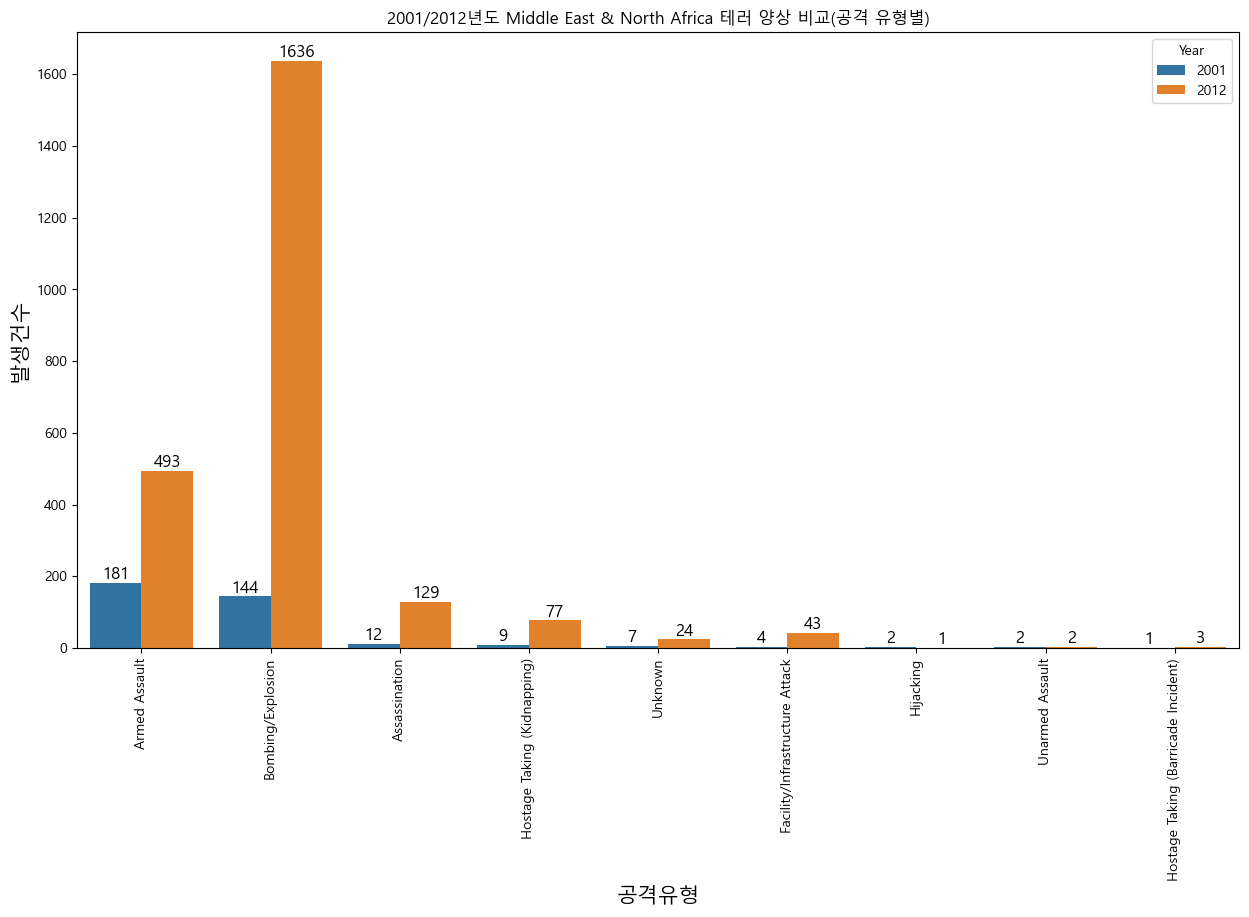

In [298]:
problem_5_draw(2001, 2012, 'Middle East & North Africa')

- 9.11 태러가 발생한 2011년보다 오히려 테러가 급상승하기 시작했던 2012년의 테러 발생 건수 차이는 2012년이 확실히 많다
- 1번 문제에서 생각한 바와 같이 종교 극단주의자에 의한 테러가 많은 것을 확인하였다
- 9.11 태러와 같은 대형 태러보다 규모가 작았는지 컸는지도 확인이 필요해 보인다

### 문제6)
- 중동&북아프리카, 남아시아, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아지역으로 구분하여 
- 70년대, 80년대, 90년대, 2000년대, 2010년대로 구분하여 특성을 분석하시오


In [282]:
df_terror[(df_terror['Year'] >= 1980) & (df_terror['Year'] < 1990)]

,Year,Month,Day,TerroCount,Region,Country,City,Target,Group,Target_type,AttackType,Weapon_type,Killed,Wounded,Casualities,Motive,Summary,latitude,longitude
9839,1980,1,1,1,Middle East & North Africa,West Bank and Gaza Strip,Nablus,Civilian Administration offices,Palestinians,Government (General),Bombing/Explosion,Explosives/Bombs/Dynamite,0.0,0.0,0.0,NaN,NaN,32.226260,35.260741
9840,1980,1,1,1,Western Europe,United Kingdom,Lisnaskea,Shop,Irish Republican Army (IRA),Business,Bombing/Explosion,Explosives/Bombs/Dynamite,0.0,0.0,0.0,NaN,NaN,54.253718,-7.441060
9841,1980,1,1,1,Western Europe,United Kingdom,Unknown,Main Road,Irish Republican Army (IRA),Private Citizens & Property,Bombing/Explosion,Explosives/Bombs/Dynamite,0.0,0.0,0.0,NaN,NaN,54.787715,-6.492314
9842,1980,1,1,1,Western Europe,United Kingdom,Middletown,Post,Irish Republican Army (IRA),Military,Bombing/Explosion,Explosives/Bombs/Dynamite,0.0,0.0,0.0,NaN,NaN,54.293235,-6.842351
9843,1980,1,1,1,South Asia,India,Imphal,Communist Politician,Maoists,Government (General),Assassination,Unknown,1.0,0.0,1.0,NaN,NaN,24.817011,93.936844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40993,1989,12,31,1,South America,Chile,Santiago,Transportation Co.,Manuel Rodriguez Patriotic Front (FPMR),Business,Bombing/Explosion,Explosives/Bombs/Dynamite,0.0,0.0,0.0,NaN,NaN,-33.469115,-70.641997
40994,1989,12,31,1,South America,Chile,Santiago,office,Manuel Rodriguez Patriotic Front (FPMR),Police,Bombing/Explosion,Explosives/Bombs/Dynamite,0.0,0.0,0.0,NaN,NaN,-33.469115,-70.641997
40995,1989,12,31,1,South America,Chile,Santiago,child care center,Manuel Rodriguez Patriotic Front (FPMR),Business,Bombing/Explosion,Explosives/Bombs/Dynamite,0.0,0.0,0.0,NaN,NaN,-33.469115,-70.641997
40996,1989,12,31,1,South America,Chile,Santiago,medical center,Manuel Rodriguez Patriotic Front (FPMR),Business,Bombing/Explosion,Explosives/Bombs/Dynamite,0.0,0.0,0.0,NaN,NaN,-33.469115,-70.641997


In [286]:
def problem_solve_6(year1, year2, region):
    
    year_df = df_terror[(df_terror['Year'] >= year1) & (df_terror['Year'] < year2)]

    region_df = year_df[['Region', 'AttackType', 'TerroCount', 'Killed', 'Wounded', 'Casualities']].groupby(['Region', 'AttackType']).sum()

    percent = np.round(region_df.loc[region]['TerroCount'].div(region_df.loc[region]['TerroCount'].sum()) * 100, 2)
    attacktype_df = region_df.loc[region].reset_index()
    result_df = pd.merge(attacktype_df, percent, on='AttackType')
    result_df = result_df.rename(columns={'TerroCount_x' : 'TerroCount', 'TerroCount_y' : 'TerrorPercent'})
    result_df = result_df.sort_values(by='TerrorPercent', ascending=False)
    result_df = result_df[['AttackType', 'TerroCount', 'TerrorPercent', 'Killed', 'Wounded', 'Casualities']]
    
    return result_df

In [287]:
problem_solve_6(2000, 2010, 'Middle East & North Africa')

,AttackType,TerroCount,TerrorPercent,Killed,Wounded,Casualities
2,Bombing/Explosion,5250,64.93,21308.0,56326.0,76346.0
0,Armed Assault,1771,21.90,5564.0,3640.0,8441.0
1,Assassination,464,5.74,802.0,1058.0,1814.0
6,Hostage Taking (Kidnapping),397,4.91,701.0,230.0,836.0
8,Unknown,98,1.21,337.0,167.0,458.0
3,Facility/Infrastructure Attack,73,0.90,102.0,212.0,242.0
7,Unarmed Assault,14,0.17,8.0,87.0,95.0
4,Hijacking,12,0.15,17.0,7.0,21.0
5,Hostage Taking (Barricade Incident),7,0.09,22.0,31.0,53.0


In [288]:
df_terror['Target_type']

0         Private Citizens & Property
1             Government (Diplomatic)
2                 Journalists & Media
3             Government (Diplomatic)
4             Government (Diplomatic)
                     ...             
170345                       Military
170346                            NGO
170347    Private Citizens & Property
170348            Journalists & Media
170349    Private Citizens & Property
Name: Target_type, Length: 170350, dtype: object

In [290]:
def problem_6_target_type(year1, year2, region):
    
    year_df = df_terror[(df_terror['Year'] >= year1) & (df_terror['Year'] < year2)]

    region_df = year_df[['Region', 'Target_type', 'TerroCount', 'Killed', 'Wounded', 'Casualities']].groupby(['Region', 'Target_type']).sum()

    percent = np.round(region_df.loc[region]['TerroCount'].div(region_df.loc[region]['TerroCount'].sum()) * 100, 2)
    target_type_df = region_df.loc[region].reset_index()
    result_df = pd.merge(target_type_df, percent, on='Target_type')
    result_df = result_df.rename(columns={'TerroCount_x' : 'TerroCount', 'TerroCount_y' : 'TerrorPercent'})
    result_df = result_df.sort_values(by='TerrorPercent', ascending=False)
    result_df = result_df[['Target_type', 'TerroCount', 'TerrorPercent', 'Killed', 'Wounded', 'Casualities']]
    result_df['Period'] = str(year1 )+ '~' + str(year2)
    
    return result_df

In [293]:
problem_6_target_type(2001, 2012, 'Middle East & North Africa')

,Target_type,TerroCount,TerrorPercent,Killed,Wounded,Casualities,Period
12,Private Citizens & Property,3867,35.35,14403.0,31294.0,44774.0,2001~2012
11,Police,1689,15.44,4773.0,9633.0,14102.0,2001~2012
5,Government (General),1473,13.46,2681.0,7420.0,10001.0,2001~2012
8,Military,1073,9.81,3418.0,6093.0,9076.0,2001~2012
1,Business,863,7.89,2735.0,7405.0,9970.0,2001~2012
13,Religious Figures/Institutions,386,3.53,2140.0,5423.0,7384.0,2001~2012
17,Transportation,367,3.35,1094.0,3165.0,4191.0,2001~2012
15,Terrorists/Non-State Militia,303,2.77,708.0,904.0,1566.0,2001~2012
2,Educational Institution,170,1.55,355.0,1071.0,1377.0,2001~2012
19,Utilities,169,1.54,135.0,125.0,241.0,2001~2012


In [299]:
def problem_6_draw(year1, year2, year3, year4, region):

    df1 = problem_6_target_type(year1, year2, region)
    df2 = problem_6_target_type(year3, year4, region)
    df = pd.concat([df1, df2])

    fig, ax = plt.subplots(figsize = (15, 8))

    sns.barplot(x=df['Target_type'], y=df['TerroCount'], hue=df['Period'])
    ax.bar_label(ax.containers[0], fontsize = 12)
    ax.bar_label(ax.containers[1], fontsize = 12)

    plt.xticks(rotation = 90)
    plt.title(f'{year1}~{year2}/{year3}~{year4}년도 {region} 테러 양상 비교(공격 대상 유형별)')
    plt.xlabel('공격유형', fontsize = 15)
    plt.ylabel('발생건수', fontsize = 15)
    plt.show()

In [300]:
df_terror['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

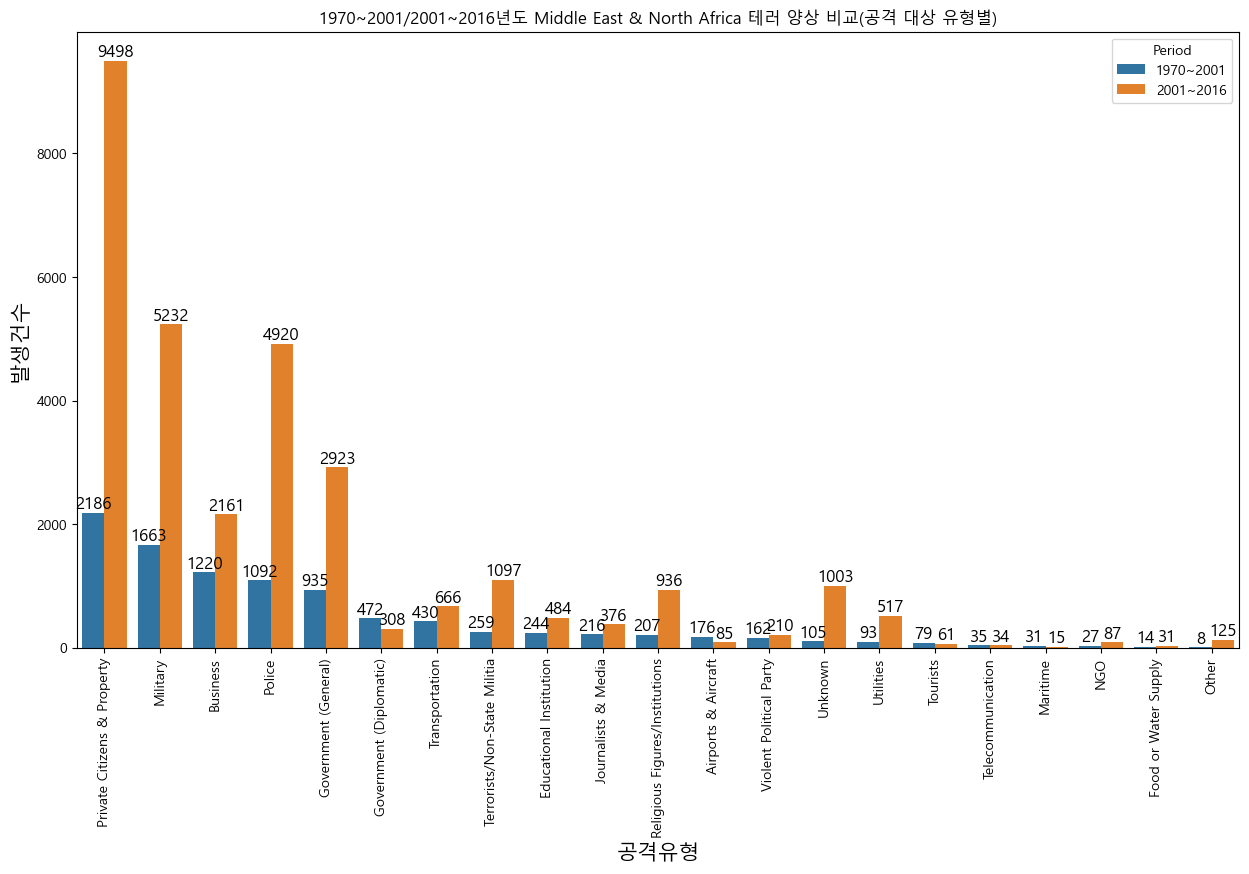

In [302]:
problem_6_draw(1970, 2001, 2001, 2016, 'Middle East & North Africa')

### 문제7)
- 우리나라의 테러를 집계해서 나름대로의 방법으로 시각화 및 분석을 수행하시오.


In [306]:
south_korea_df = df_terror[df_terror['Country'] == 'South Korea'].reset_index(drop=True)
south_korea_df.tail(2)

,Year,Month,Day,TerroCount,Region,Country,City,Target,Group,Target_type,AttackType,Weapon_type,Killed,Wounded,Casualities,Motive,Summary,latitude,longitude
36,2015,3,5,1,East Asia,South Korea,Seoul,Ambassador to South Korea: Mark Lippert,Unknown,Government (Diplomatic),Assassination,Melee,0.0,1.0,1.0,"The specific motive is unknown; however, sourc...",03/05/2015: An assailant attacked Mark Lippert...,37.572525,126.975643
37,2016,12,1,1,East Asia,South Korea,Gumi,Memorial of President Park Chung-hee,Anti-Park extremists,Private Citizens & Property,Facility/Infrastructure Attack,Incendiary,0.0,0.0,0.0,"An unaffiliated individual, identified as Baek...",12/01/2016: An assailant set fire to the Memor...,36.119485,128.344573


In [310]:
# 대한민국 년도별 테러 발생 건수
print('대한민국 발생 테러 건수는 총{}건 입니다.'.format(south_korea_df['TerroCount'].sum()))

south_korea_df.groupby('Year')['TerroCount'].sum().reset_index()

대한민국 발생 테러 건수는 총38건 입니다.


,Year,TerroCount
0,1974,1
1,1982,1
2,1983,1
3,1986,2
4,1988,8
5,1989,1
6,1990,3
7,1991,6
8,1992,3
9,1994,2


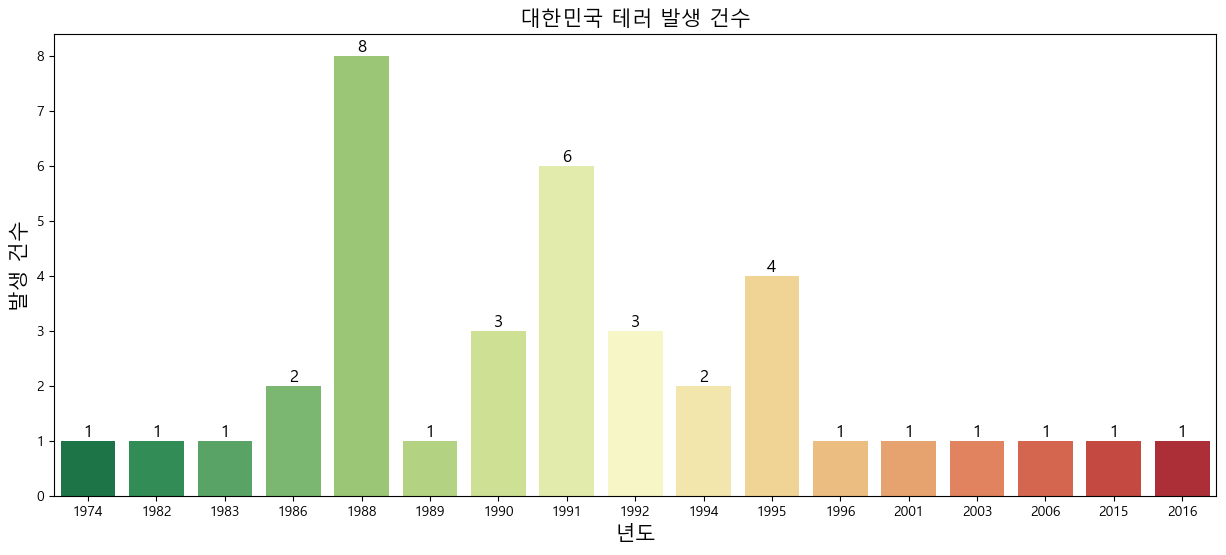

In [312]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.countplot(x='Year', data=south_korea_df, palette='RdYlGn_r')
ax.bar_label(ax.containers[0], fontsize = 12)

plt.title('대한민국 테러 발생 건수', fontsize = 15)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('발생 건수', fontsize = 15)

plt.show()

In [315]:
# 테러 사망자, 부상자, 사상자 분석

south_korea_casualities_df = south_korea_df.groupby('Year')[['Killed', 'Wounded', 'Casualities']].sum().reset_index()
south_korea_casualities_df

,Year,Killed,Wounded,Casualities
0,1974,1.0,0.0,1.0
1,1982,1.0,3.0,4.0
2,1983,1.0,4.0,5.0
3,1986,5.0,30.0,35.0
4,1988,0.0,0.0,0.0
5,1989,0.0,0.0,0.0
6,1990,0.0,1.0,1.0
7,1991,0.0,0.0,0.0
8,1992,1.0,0.0,1.0
9,1994,1.0,1.0,2.0


<Axes: xlabel='Year'>

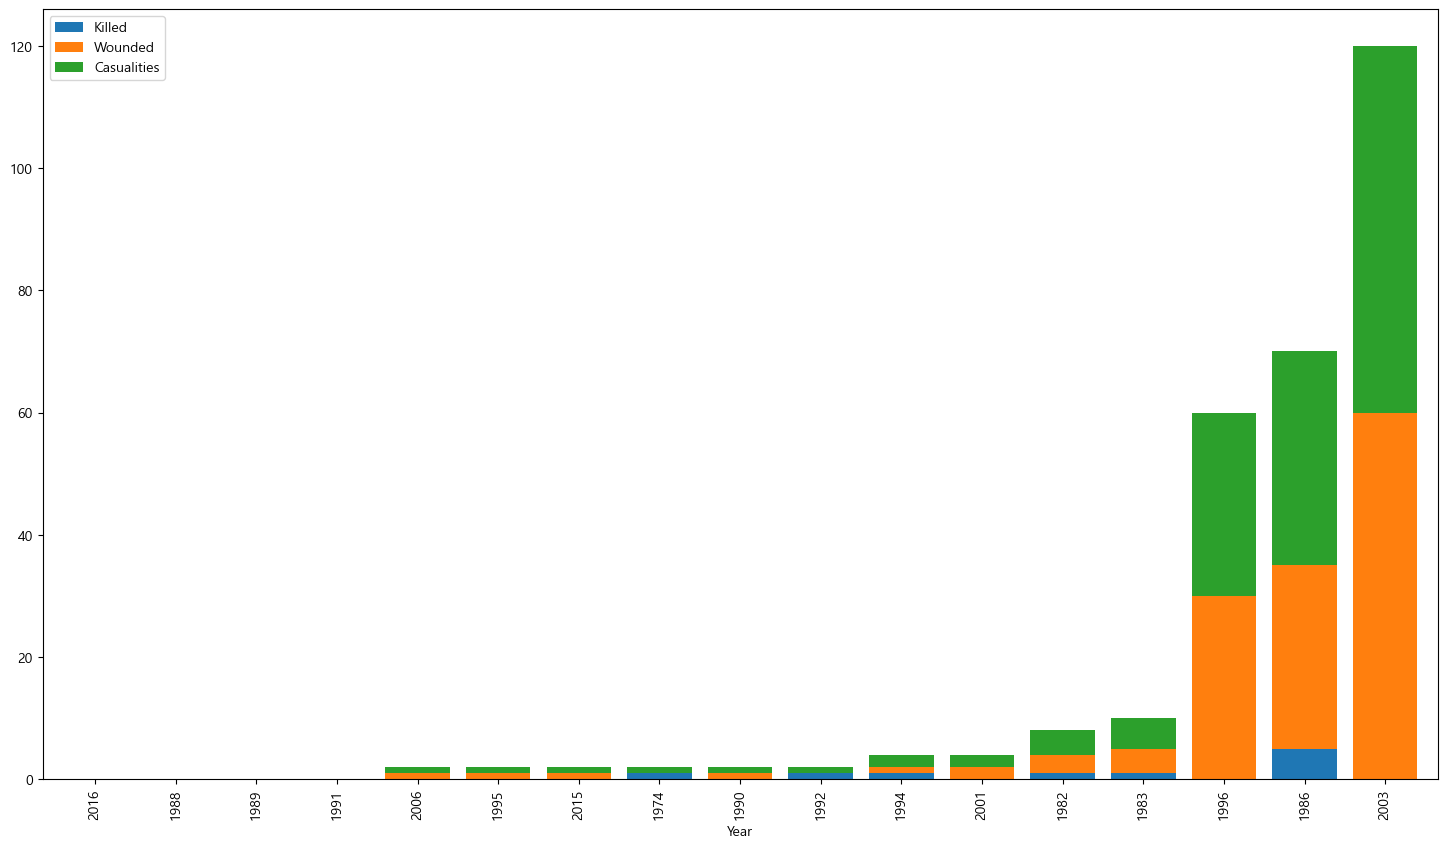

In [321]:
south_korea_casualities_df.sort_values(by='Casualities', ascending=True).plot(x='Year', y=['Killed', 'Wounded', 'Casualities'],
                                                                kind='bar',stacked=True, figsize=(18, 10), width = 0.8)

- 데이터 상으로 가장 많은 테러가 발생한 1988년의 인명 피해는 없는 것을 확인
- 오히려 2003년에 1건 이었던 테러가 인명피해가 가장 많은 것으로 확인하였으며 사망자는 없다

In [322]:
# 2003년 테러 확인

south_korea_df[south_korea_df['Year'] == 2003]

,Year,Month,Day,TerroCount,Region,Country,City,Target,Group,Target_type,AttackType,Weapon_type,Killed,Wounded,Casualities,Motive,Summary,latitude,longitude
34,2003,11,17,1,East Asia,South Korea,Buan,Buan Riot Police,Unknown,Police,Armed Assault,Incendiary,0.0,60.0,60.0,The protestors wanted to keep a nuclear waste ...,"11/17/2003: Protestors turned violent in Buan,...",35.731566,126.733465


- 2003년 부안에서 핵폐기장 지정에 따른 주민들의 반대 시위가 있었으며 이때 경찰과의 무력 충돌로 인명 피해 발생
- 해당 사건은 주민들의 생존권 또는 님비 현상에 의한 시위 형태이지만 이번 데이터에서는 이를 테러로 규정하였다
- 과연 시위에 의한 인명 피해가 테러라 규정 하는 것이 옳은 것인지 의문을 가져본다

### 문제8
- 불특정 민간인을 대상으로 한 테러는 “악”이라고 할 수 있습니다.
- 이런 테러의 어둡고 무서운 면을 강조할 수 있는 방법을 고민하여 데이터를 분석하고 시각화하여 제시하시오.

In [327]:
# 테러를 많이 받은 상위 10개 대상(전체기간)

target_type_top10 = df_terror['Target_type'].value_counts()[:10]
target_type_percent = np.round(target_type_top10.div(target_type_top10.sum()) * 100, 2)
target_type_top10_df = pd.merge(target_type_top10, target_type_percent, on=target_type_top10.index)
target_type_top10_df = target_type_top10_df.rename(columns={
    'key_0' : 'Target_type', 'count_x' : 'TerrorCount', 'count_y' : 'TerrorPercent'
})

target_type_top10_df

,Target_type,TerrorCount,TerrorPercent
0,Private Citizens & Property,39994,25.91
1,Military,25508,16.52
2,Police,22938,14.86
3,Government (General),20314,13.16
4,Business,19873,12.87
5,Transportation,6657,4.31
6,Utilities,5848,3.79
7,Unknown,4873,3.16
8,Religious Figures/Institutions,4198,2.72
9,Educational Institution,4160,2.69


In [328]:
# 테러 활동이 활발한 그룹 비교

category_data_eda('Group')

Group Data
Basic Information
Data Length-> 3454
Data Nan-> 0
Top 5 Data-> Group
Unknown                                             78306
Taliban                                              6575
Shining Path (SL)                                    4551
Islamic State of Iraq and the Levant (ISIL)          4287
Farabundo Marti National Liberation Front (FMLN)     3351
Name: count, dtype: int64
Uniqe Data List
['MANO-D' '23rd of September Communist League' 'Unknown'
 'Black Nationalists' 'Tupamaros (Uruguay)' "New Year's Gang"
 'Weather Underground, Weathermen' 'Left-Wing Militants'
 'Armed Commandos of Liberation' 'Commune 1']


In [329]:
group_top10 = df_terror['Group'].value_counts()[:10]
target_type_percent = np.round(group_top10.div(group_top10.sum()) * 100, 2)
group_top10_df = pd.merge(group_top10, target_type_percent, on=group_top10.index)
group_top10_df = group_top10_df.rename(columns={
    'key_0' : 'Group', 'count_x' : 'TerrorCount', 'count_y' : 'TerrorPercent'
})

group_top10_df

,Group,TerrorCount,TerrorPercent
0,Unknown,78306,71.53
1,Taliban,6575,6.01
2,Shining Path (SL),4551,4.16
3,Islamic State of Iraq and the Levant (ISIL),4287,3.92
4,Farabundo Marti National Liberation Front (FMLN),3351,3.06
5,Al-Shabaab,2683,2.45
6,Irish Republican Army (IRA),2669,2.44
7,Revolutionary Armed Forces of Colombia (FARC),2481,2.27
8,New People's Army (NPA),2414,2.21
9,Kurdistan Workers' Party (PKK),2152,1.97


In [332]:
group_top10_df['Group'][3], group_top10_df['Group'][1]

('Islamic State of Iraq and the Levant (ISIL)', 'Taliban')

In [334]:
is_df = df_terror[df_terror['Group'] == group_top10_df['Group'][3]]
taliban_df = df_terror[df_terror['Group'] == group_top10_df['Group'][1]]
top2_group_df = pd.concat([is_df, taliban_df])
top2_group_df

,Year,Month,Day,TerroCount,Region,Country,City,Target,Group,Target_type,AttackType,Weapon_type,Killed,Wounded,Casualities,Motive,Summary,latitude,longitude
116020,2013,4,18,1,Middle East & North Africa,Iraq,Baghdad,Cafe,Islamic State of Iraq and the Levant (ISIL),Business,Bombing/Explosion,Explosives/Bombs/Dynamite,28.0,50.0,78.0,"The specific motive is unknown; however, sourc...",04/18/2013: A suicide bomber detonated an expl...,33.297678,44.290423
116092,2013,4,20,1,Middle East & North Africa,Iraq,Latifiyah,Voting Center,Islamic State of Iraq and the Levant (ISIL),Government (General),Bombing/Explosion,Explosives/Bombs/Dynamite,0.0,4.0,4.0,NaN,04/20/2013: Assailants launched two mortar rou...,32.985052,44.356585
116093,2013,4,20,1,Middle East & North Africa,Iraq,Mahmudiyah,Voting Center,Islamic State of Iraq and the Levant (ISIL),Government (General),Bombing/Explosion,Explosives/Bombs/Dynamite,0.0,0.0,0.0,NaN,04/20/2013: Mortars landed near a voting cente...,33.054860,44.366541
116094,2013,4,20,1,Middle East & North Africa,Iraq,Samarra,Voting Center,Islamic State of Iraq and the Levant (ISIL),Government (General),Bombing/Explosion,Explosives/Bombs/Dynamite,0.0,0.0,0.0,NaN,04/20/2013: Mortars landed near a voting cente...,34.194765,43.874531
116837,2013,5,11,1,Middle East & North Africa,Turkey,Reyhanli,City Hall,Islamic State of Iraq and the Levant (ISIL),Government (General),Bombing/Explosion,Explosives/Bombs/Dynamite,27.0,70.0,97.0,"The specific motive is unknown; however, gover...",05/11/2013: An explosives-laden vehicle detona...,36.267624,36.566705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170339,2016,12,31,1,South Asia,Afghanistan,Zoqum,Checkposts,Taliban,Military,Unknown,Unknown,1.0,1.0,2.0,NaN,12/31/2016: Assailants attacked a security pos...,36.662402,65.748508
170340,2016,12,31,1,South Asia,Afghanistan,Jakdalk,Checkposts,Taliban,Military,Unknown,Unknown,1.0,1.0,2.0,NaN,12/31/2016: Assailants attacked a security pos...,36.667981,65.751084
170341,2016,12,31,1,South Asia,Afghanistan,Shirkhel,Checkposts,Taliban,Military,Unknown,Unknown,0.0,2.0,2.0,NaN,12/31/2016: Assailants attacked a security pos...,36.666222,65.754795
170342,2016,12,31,1,South Asia,Afghanistan,Tofan,Checkposts,Taliban,Military,Unknown,Unknown,0.0,1.0,1.0,NaN,12/31/2016: Assailants attacked a security pos...,36.659695,65.752408


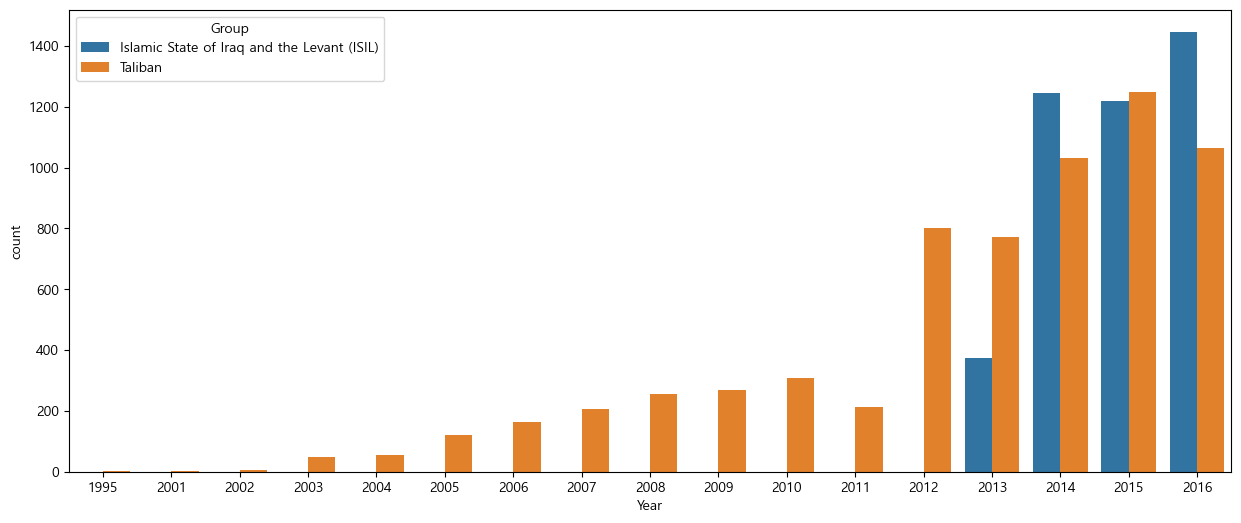

In [335]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.countplot(data=top2_group_df, x='Year', hue="Group")
plt.show()

- 탈레반은 1995년부터 꾸준히 테러를 발생시키는 집단
- IS는 2013년 등장 이후 가장 활발한 테러를 발생시키는 집단
- IS가 2013년 이후 탈레반과 비슷하거나 더 많은 테러를 발생 중

In [340]:
# 탈레반과 IS의 공격 형태

taliban_df.value_counts('AttackType')[:9]

AttackType
Bombing/Explosion                      2629
Armed Assault                          1858
Unknown                                 725
Hostage Taking (Kidnapping)             636
Assassination                           449
Facility/Infrastructure Attack          216
Unarmed Assault                          32
Hostage Taking (Barricade Incident)      18
Hijacking                                12
Name: count, dtype: int64

In [341]:
is_df.value_counts('AttackType')[:9]

AttackType
Bombing/Explosion                      2844
Hostage Taking (Kidnapping)             500
Unknown                                 465
Armed Assault                           312
Assassination                           104
Facility/Infrastructure Attack           42
Hostage Taking (Barricade Incident)      16
Hijacking                                 4
Name: count, dtype: int64

- 탈레반과 IS 모두 폭탄테러가 많다
- unkown을 제외하면 탈레반은 무장 공격 비중이 폭탄테러만큼 많고 IS는 인질극 및 유괴가 폭탄테러 다음으로 비중이 많았다

In [343]:
taliban_df.columns

Index(['Year', 'Month', 'Day', 'TerroCount', 'Region', 'Country', 'City',
       'Target', 'Group', 'Target_type', 'AttackType', 'Weapon_type', 'Killed',
       'Wounded', 'Casualities', 'Motive', 'Summary', 'latitude', 'longitude'],
      dtype='object')

In [345]:
# 탈레반과 IS의 공격 대상은?

taliban_df.groupby('Target_type')[['TerroCount', 'Killed', 'Wounded', 'Casualities']].sum().sort_values('TerroCount', ascending=False)[:5]

,TerroCount,Killed,Wounded,Casualities
Target_type,,,,
Police,2201,9065.0,6987.0,14928.0
Private Citizens & Property,1264,5015.0,4519.0,9008.0
Military,1213,5638.0,4879.0,9919.0
Government (General),851,2440.0,3864.0,6148.0
Business,206,539.0,529.0,1055.0


In [346]:
is_df.groupby('Target_type')[['TerroCount', 'Killed', 'Wounded', 'Casualities']].sum().sort_values('TerroCount', ascending=False)[:5]

,TerroCount,Killed,Wounded,Casualities
Target_type,,,,
Private Citizens & Property,1724,11078.0,12403.0,20676.0
Military,991,9854.0,4363.0,9531.0
Police,529,4021.0,2869.0,6500.0
Business,223,2240.0,2532.0,4039.0
Terrorists/Non-State Militia,210,1073.0,994.0,1734.0


In [347]:
print('='*100)
print('Taliban Targey_type')
print(taliban_df.groupby('Target_type')[['TerroCount', 'Killed', 'Wounded', 'Casualities']].sum().sort_values('TerroCount', ascending=False)[:5])
print('='*100)
print('IS Targey_type')
print(is_df.groupby('Target_type')[['TerroCount', 'Killed', 'Wounded', 'Casualities']].sum().sort_values('TerroCount', ascending=False)[:5])

Taliban Targey_type
                             TerroCount  Killed  Wounded  Casualities
Target_type                                                          
Police                             2201  9065.0   6987.0      14928.0
Private Citizens & Property        1264  5015.0   4519.0       9008.0
Military                           1213  5638.0   4879.0       9919.0
Government (General)                851  2440.0   3864.0       6148.0
Business                            206   539.0    529.0       1055.0
IS Targey_type
                              TerroCount   Killed  Wounded  Casualities
Target_type                                                            
Private Citizens & Property         1724  11078.0  12403.0      20676.0
Military                             991   9854.0   4363.0       9531.0
Police                               529   4021.0   2869.0       6500.0
Business                             223   2240.0   2532.0       4039.0
Terrorists/Non-State Militia         210   

- 탈레반 주 공격 대상은 경찰 > 군인 > 민간인 순서로 나타난다
- IS 주 공격 대상은 민간인 > 군인 > 경찰 순서로 나타난다
- 두 집단의 공격형태 1순위는 폭탄으로 똑같으나 공격대상 1위는 차이를 보이고 있다
- IS는 탈레반에 비해 민간인 테러 행위가 굉장히 높다
